> 概率图模型（Probabilistic Graphical Models，PGM）是指：你想描述不同变量之间的关系，但是，你又对这些变量不太确定，只有一定程度的相信或者一些不确定的知识。现在我们知道，概率是表示和处理不确定性的严密的数学方法。

> Probabilistic Graphical Models (PGM for short) are exactly that: you want to
describe relationships between variables. However, you don't have any certainty
about your variables, but rather beliefs or uncertain knowledge. And we know now
that probabilities are the way to represent and deal with such uncertainties, in a
mathematical and rigorous way

> living beings in general and human beings (as well as many other animals)
exhibit this incredible capacity to adapt and improve using their experience, their
errors, and what they observe in the world.

> 投掷硬币是一类可以重复多次，甚至上千次或任意次的试验。然而，赛马并不是可以重复多次的试验。你最喜欢的团队赢得下次球赛的概率是多少？这也不是可以重复多次的试验：事实上，你只可以试验一次，因为只有一次比赛。但是由于你非常相信你的团队是今年最厉害的，你会指认一个概率，例如0.9，来确信你的团队会拿下下一次比赛。

> 联合概率分布的最后一个重要概念是边缘化（Marginalization）。当你考察几个随机变量的概率分布，即联合概率分布时，你也许想从分布中消除一些变量，得到较少变量的分布。

在这个公式中，我们把
- P(X|Y)叫作是给定Y下X的后验分布。
- P(X)叫作先验分布。
- P(Y|X)叫做似然率
- P(Y)叫做归一化因子。

![](http://upload.ouliu.net/i/201901251146426q5rf.gif)

![](http://upload.ouliu.net/i/20190125114828u8q6a.gif)
- 先验分布P(θ)是指我们在知道其他信息之前对θ的认识——我的初始信念。
- 给定θ值下的似然率，是指我可以生成什么样的数据D。换句话说，对于所有的θ，D的概率是多少。
- 后验概率P(θ|D)，是指观察到D之后，对θ的新信念。

`假设我们有一个制作灯泡的机器。你想知道机器是正常工作还是有问题。`

In [1]:
prior <- c(working=0.99,broken=0.01)
likelihood <- rbind(
                   working=c(good=0.99,bad=0.01),
                   broken=c(good=0.6,bad=0.4))
data <- c('bad','bad','bad','bad')

In [3]:
likelihood

good bad 
working 0.99 0.01
broken  0.60 0.40

In [9]:
bayes <- function(prior,likelihood,data){
    posterior <- matrix(0,nrow=length(data),ncol=length(prior))
    dimnames(posterior) <- list(data,names(prior))
    
    initial_prior <- prior
    for (i in 1:length(data))
        {
        posterior[i,] <- 
            prior*likelihood[,data[i]]/
            sum(prior*likelihood[,data[i]])
        
        prior <- posterior[i,]
    }
    return(rbind(initial_prior,posterior))
}

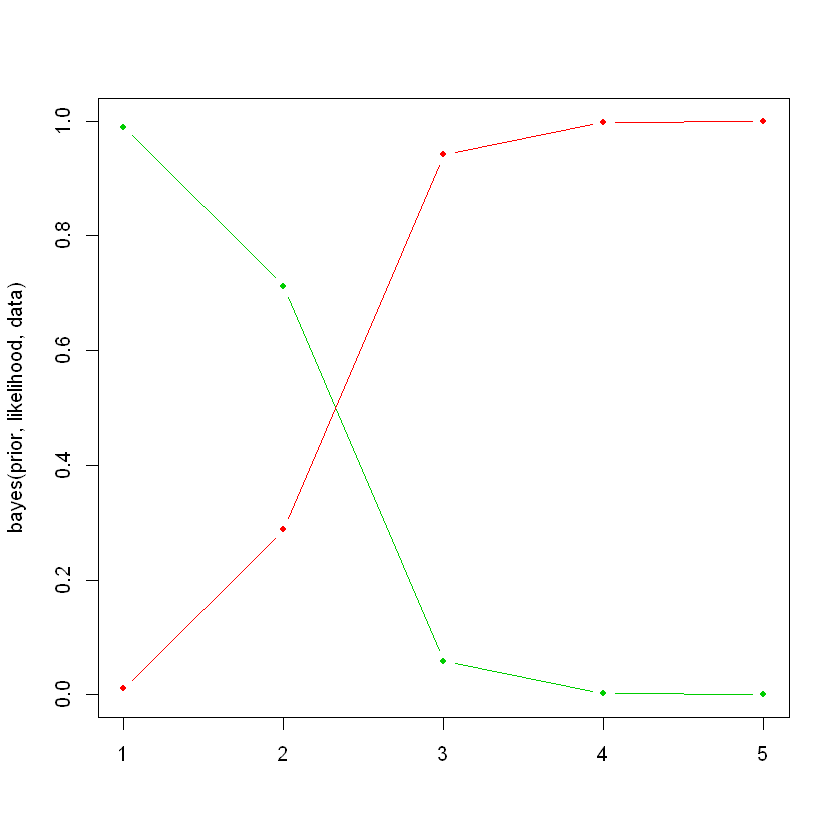

In [10]:
#Plot the columns of one matrix against the columns of another.
matplot(bayes(prior,likelihood,data),
       t='b',lty=1,pch=20,col=c(3,2))

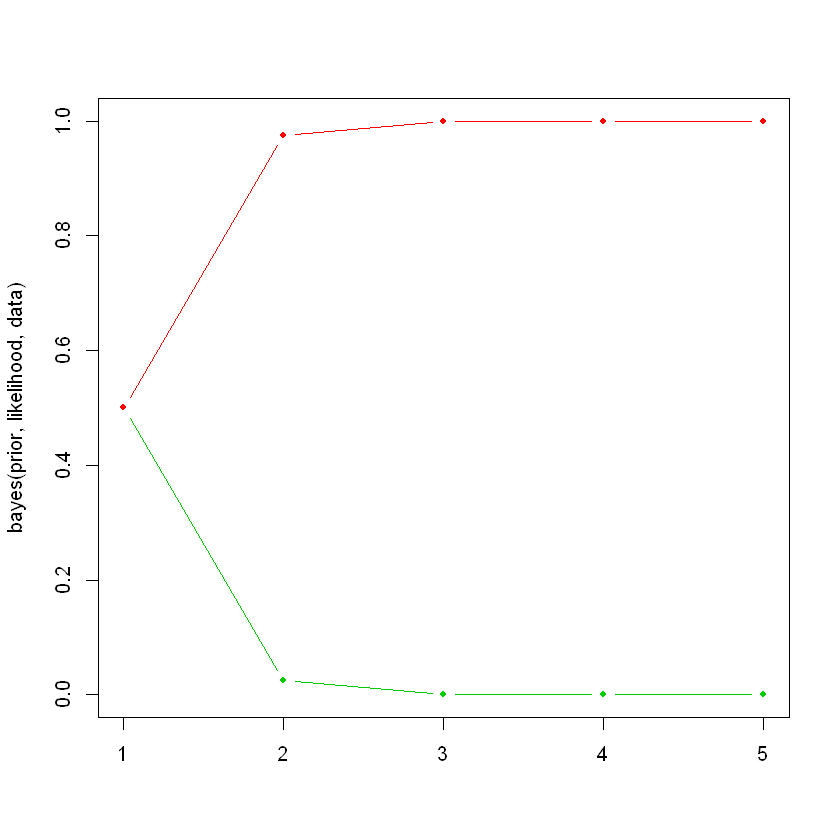

In [11]:
prior <- c(working=0.5,broken=0.5)
matplot(bayes(prior,likelihood,data),
       t='b',lty=1,pch=20,col=c(3,2))

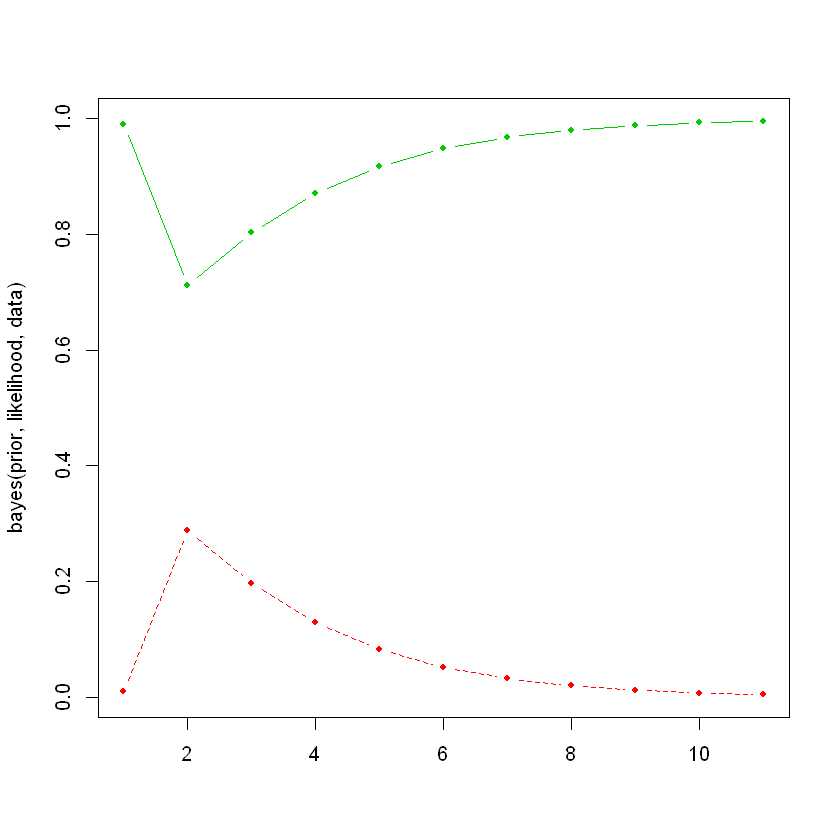

In [12]:
prior =c(working =0.99, broken =0.01)  
data =c("bad", "good", "good", "good", "good", "good", "good", 
"good", "good", "good") 
matplot(bayes(prior, likelihood, data), t ='b', pch =20, col =c(3, 2)) 

- #机器正常的概率快速下降（实线或绿色线）
- #红色线或虚线表示机器有问题。

`PGM`
例如，在医学诊断中，每一个变量表示一个症状。我们可以拿到许多这样的变量。其他变量可以表示病人的年龄、性别、体温、血压等。我们可以使用许多不同的变量表示病人状态。我们也可以加入其他信息，例如最近的天气条件，病人的年龄和饮食状况。

从这个复杂的系统中，我们想解决两个问题：

从病人的数据库中，我们希望评估和发现所有概率分布，以及相关参数。这当然是自动的过程。
我们希望把问题放入模型中，例如，“如果我们观察到了一系列症状，我们病人是否还健康？”。类似的，“如果我改变病人的饮食，并开了这个药，我的病人是否会恢复？”。

- Directed model
- UNdirected model

In [2]:
# source("http://bioconductor.org/biocLite.R") 
# biocLite() 
# install.packages("gRain")
library(gRain)
library(gRbase)

In [13]:
graph <- ug("A:B:E + C:E:D")
class(graph)  

[1] "graphNEL"
attr(,"package")
[1] "graph"

In [8]:
source("http://bioconductor.org/biocLite.R") 
biocLite() 
library(Rgraphviz)

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.2 (2018-12-20).
Installing package(s) 'Biobase', 'IRanges', 'AnnotationDbi'
also installing the dependencies 'assertthat', 'bit', 'prettyunits', 'bit64', 'blob', 'memoise', 'BH', 'plogr', 'S4Vectors', 'DBI', 'RSQLite'



package 'assertthat' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'BH' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'S4Vectors' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'Biobase' successfully unpacked and MD5 sums checked
package 'IRanges' successfully unpacked and MD5 sums checked
package 'AnnotationDbi' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\randa\AppData\Local\Temp\RtmpagOQ32\downloaded_packages


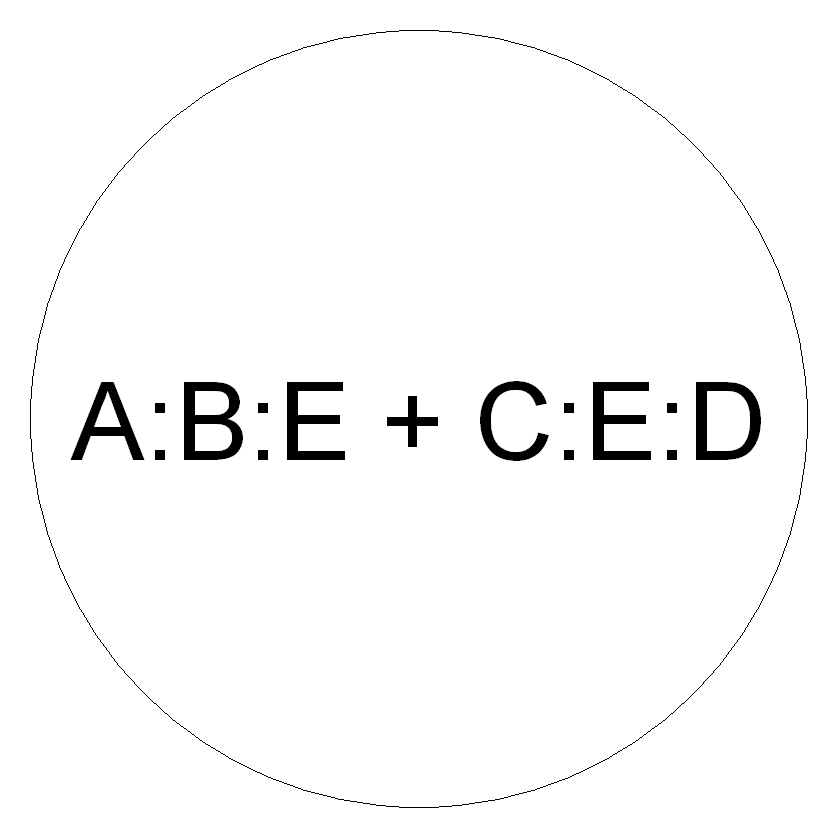

In [17]:
plot(graph)

In [18]:
dag <- dag("A + B:A + C:B + D:B + E:C:D")
dag

A graphNEL graph with directed edges
Number of Nodes = 1 
Number of Edges = 0 

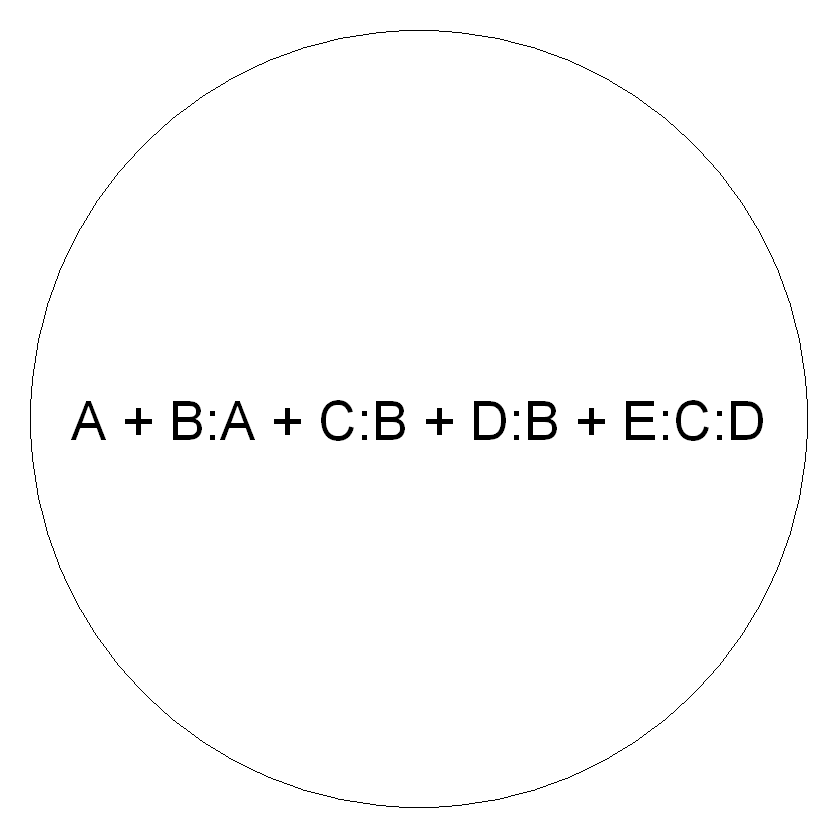

In [20]:
plot(dag)  